## Plotting PNA

In [1]:
#Import modules needed.
import xarray as xr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
#Reads in PNA file using xarray.
PNA =  xr.open_dataset("PNA_daily_1836_2015.nc")
PNA

<xarray.Dataset>
Dimensions:    (time: 65744)
Coordinates:
  * time       (time) datetime64[ns] 1836-01-01 1836-01-02 ... 2015-12-31
    level      float32 ...
    dayofyear  (time) int64 ...
Data variables:
    hgt        (time) float64 ...

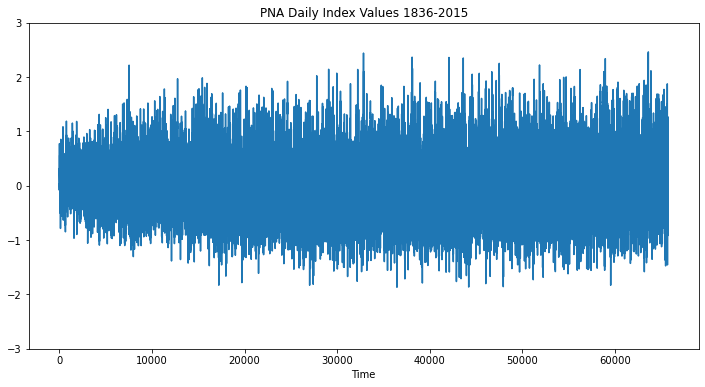

In [3]:
#Entire Daily PNA Index for years 1836-2015
plt.figure(figsize=(12,6))
plt.plot(PNA.hgt.values)
plt.title('PNA Daily Index Values 1836-2015')
plt.ylabel('')
plt.xlabel('Time')
plt.ylim(-3.,3)
plt.xlim()
plt.hlines(0,1836,2015, color='black')
plt.show()

## DatePicker
#### Choose a date between 01-01-1836 and 12-31-2015 to display the last 60 days of PNA indicies. The selected date will be the start date.

In [4]:
#Sets DatePicker widget
w = widgets.DatePicker(description='Pick a Date')    
    
display(w)

DatePicker(value=None, description='Pick a Date')

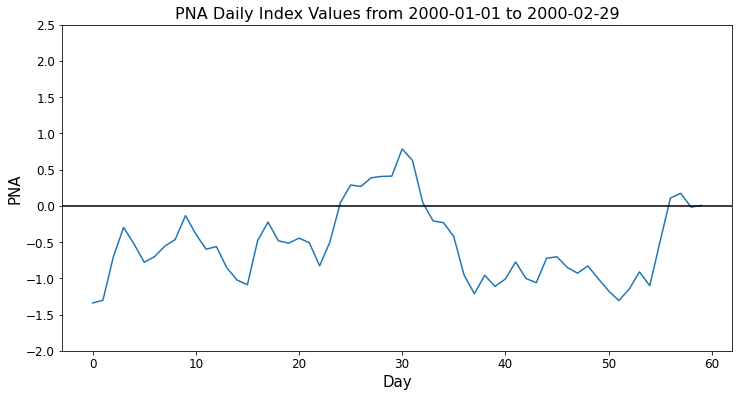

In [6]:
def Plot():
    #Sets selected time to a date string for file selection
    start_time = f'{w.value}T00:00:00.000000000'

    #Adds 60 days from the initial start date and converts to a date string
    t = w.value + timedelta(days=59)
    dt = f'{t}T00:00:00.000000000'

    #Selects the 60 days from the PNA file
    new = PNA.sel(time = slice(start_time, dt))

    #Create and plot the PNA daily indicies for the selected 60 days
    plt.figure(figsize=(12,6))
    plt.plot(new.hgt.values)
    plt.title(f'PNA Daily Index Values from {w.value} to {t}', fontsize=16)
    plt.ylabel('PNA', fontsize=15)
    plt.xlabel('Day', fontsize=15)
    plt.ylim(-2.,2.5)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.axhline(y = 0, color='black')
    plt.show()
    
#Call the PLot function to display the PNA time series plot   
Plot()

## DatePicker
#### Choose a start and end date to plot PNA daily indices

In [7]:
#Sets DatePicker widget
w = widgets.DatePicker(description='Start Date')
v = widgets.DatePicker(description='End Date')  
    
display(w, v)

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

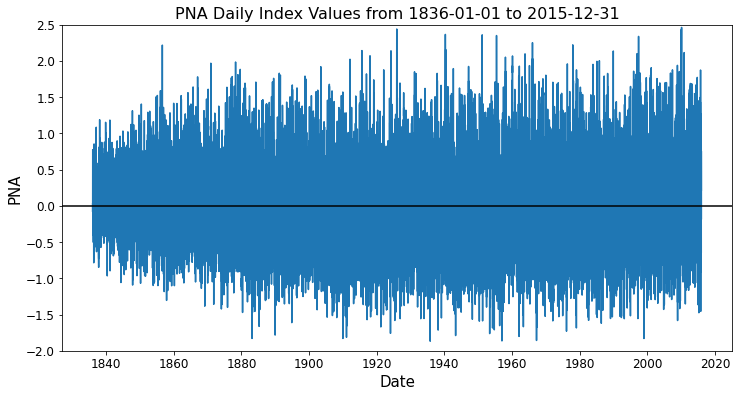

In [8]:
def Plot():
    #Sets selected time to a date string for file selection
    start_time = f'{w.value}T00:00:00.000000000'
    end_time = f'{v.value}T00:00:00.000000000'

    #Time delta for plotting purposes
    dt = v.value - w.value
    
    #Make a pandas array for the selected date range
    date_generated = pd.date_range(w.value, v.value)
    
    #Selects the 60 days from the PNA file
    new = PNA.sel(time = slice(start_time, end_time))
    
    #Create and plot the PNA daily indicies for the selected date range
    plt.figure(figsize=(12,6))
    plt.plot(date_generated, new.hgt.values)
    plt.title(f'PNA Daily Index Values from {w.value} to {v.value}', fontsize=16)
    plt.ylabel('PNA', fontsize=15)
    plt.xlabel('Date', fontsize=15)
    plt.ylim(-2.,2.5)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.axhline(y = 0, color='black')
    plt.show()

#Call the PLot function to display the PNA time series plot   
Plot()